Prediction of the Medical Cost Using the Neural Networks Regression Model

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
data.head()
data_onehot = pd.get_dummies(data)
data_onehot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
X = data_onehot.drop("charges",axis=1)
y = data_onehot["charges"]
X.head(),y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)
len(Xtrain),len(Xtest)

(1070, 268)

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))

model.compile(loss = tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),metrics=["mae"])

history = model.fit(tf.expand_dims(Xtest,axis=(-1)),ytest,epochs=200)

Epoch 1/200
9/9 [==============================] - 2s 6ms/step - loss: 12971.9688 - mae: 12971.9688
Epoch 2/200
9/9 [==============================] - 0s 6ms/step - loss: 12961.7783 - mae: 12961.7783
Epoch 3/200
9/9 [==============================] - 0s 6ms/step - loss: 12942.0010 - mae: 12942.0010
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 12881.6582 - mae: 12881.6582
Epoch 5/200
9/9 [==============================] - 0s 7ms/step - loss: 12688.8301 - mae: 12688.8301
Epoch 6/200
9/9 [==============================] - 0s 9ms/step - loss: 12247.1797 - mae: 12247.1797
Epoch 7/200
9/9 [==============================] - 0s 8ms/step - loss: 11941.4902 - mae: 11941.4902
Epoch 8/200
9/9 [==============================] - 0s 5ms/step - loss: 11919.1465 - mae: 11919.1465
Epoch 9/200
9/9 [==============================] - 0s 6ms/step - loss: 11903.8066 - mae: 11903.8066
Epoch 10/200
9/9 [==============================] - 0s 7ms/step - loss: 11889.6309 - mae: 11889.6309

In [ ]:
model.evaluate(Xtest,ytest)

9/9 [==============================] - 0s 4ms/step - loss: 8631.9326 - mae: 8631.9326


[8631.9326171875, 8631.9326171875]

<Axes: >

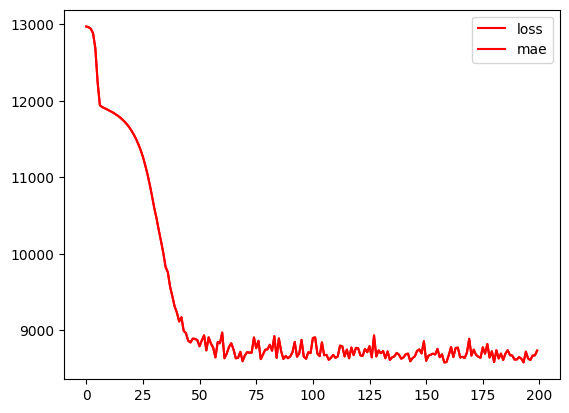

In [ ]:

pd.DataFrame(history.history).plot(c="r")

<Axes: ylabel='Frequency'>

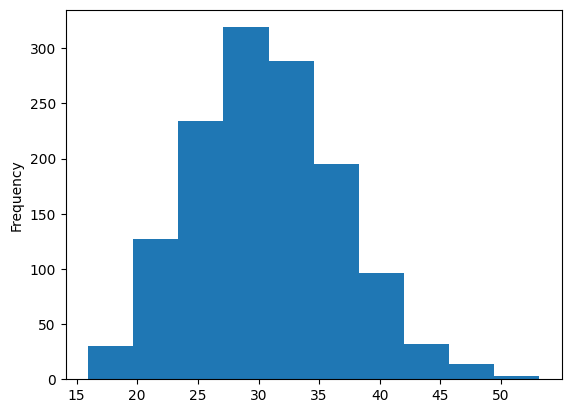

In [ ]:
X["bmi"].plot(kind="hist")